# Add 50% of outlier

In [1]:
import sys
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import outliers_utils
import pandas as pd
import ML_algorithms
from sklearn.metrics import classification_report

# Return to previous directory
os.chdir('..')

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_original = df.copy()
df_original.dropna(axis=0,inplace=True)
df_original = df_original[df_original['age'] >= 0]


df.dropna(axis=0, inplace=True)
df = df[df['age'] >= 0]

outliers_utils.drop_negative_age(df)

## Age

In [2]:
df = df_original.copy()

In [3]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'age')

--------------------------------------
no outliers detected


In [4]:
df_age = outliers_utils.outliers_replace(df, 'age', 50)

Outliers found:


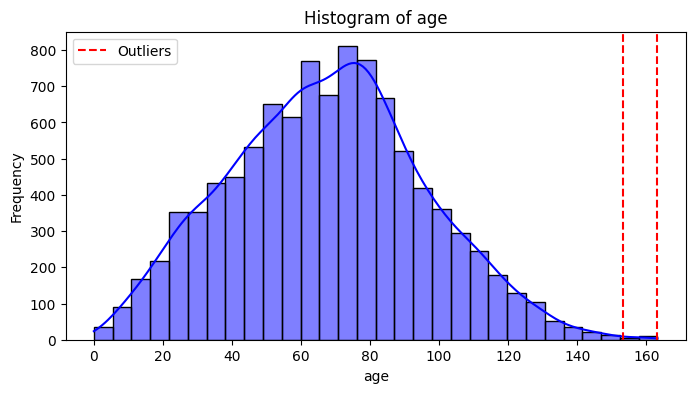

In [5]:
outliers_utils.visualize_outliers_specific(df_age, 'age')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      1541
           1       0.81      0.95      0.88      1455

    accuracy                           0.87      2996
   macro avg       0.88      0.87      0.87      2996
weighted avg       0.88      0.87      0.87      2996

Node Labels:
 Annotation(0.5845, 0.954545, 'avg_glucose_level <= 162.045\nsamples = 6988\nvalue = [3527, 3461]\nclass = 0')


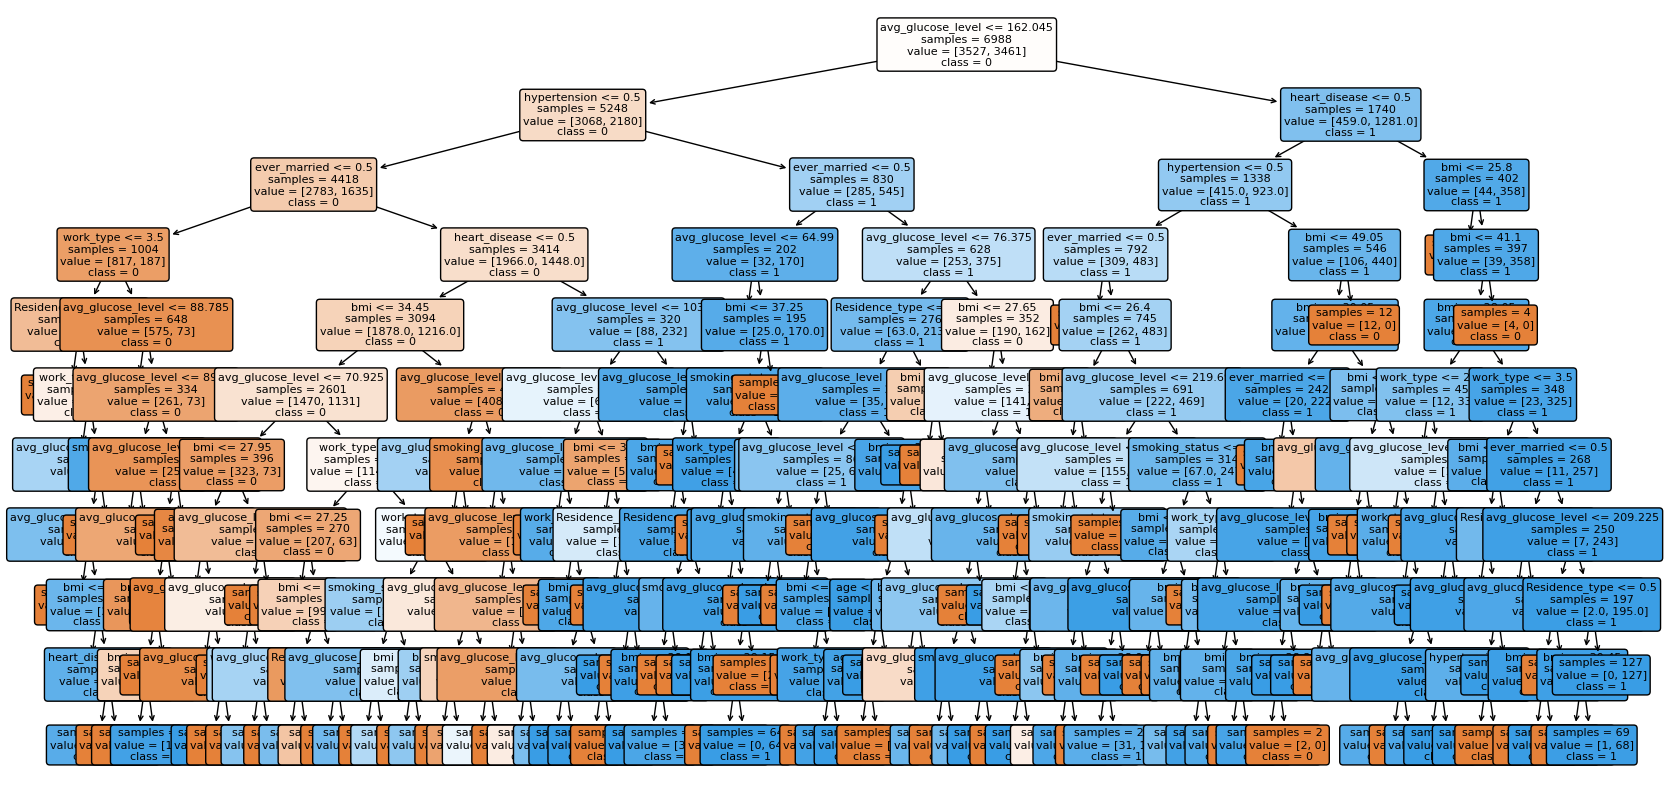

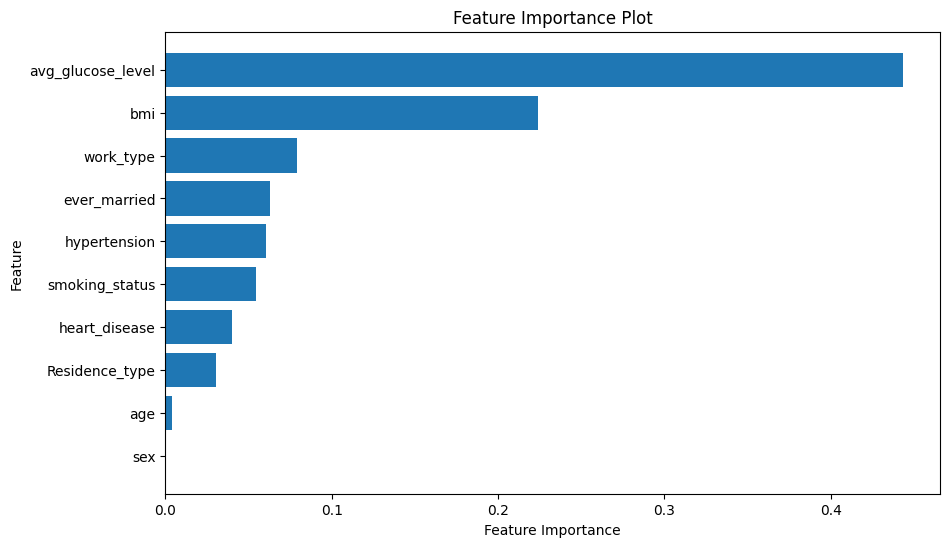

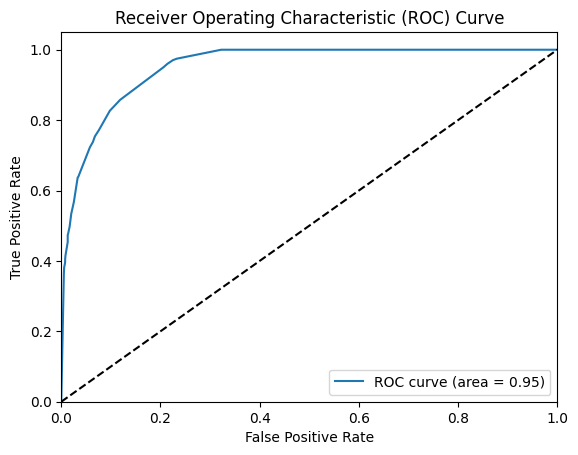

AUC Score: 0.9515149487881078


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8166666666666667, 0.8366666666666667, 0.84, 0.8, 0.7866666666666666, 0.7866666666666666, 0.7725752508361204, 0.8060200668896321, 0.822742474916388, 0.8127090301003345]
Mean accuracy: 0.808071348940914
95% confidence interval: (0.7922660642304328, 0.8238766336513953)


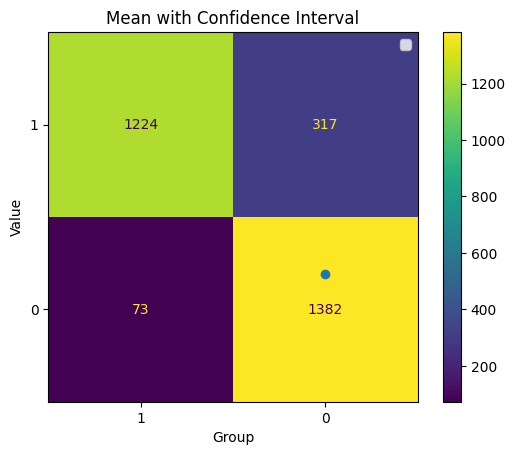

In [6]:
y_pred_prob_age_dt, y_test_age_dt, decision_tree = ML_algorithms.model_dt(df_age, df_original)
mean_accuracy_dt_age, confidence_interval_dt_age = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.66      0.76      0.71      1541
           1       0.70      0.58      0.64      1455

    accuracy                           0.68      2996
   macro avg       0.68      0.67      0.67      2996
weighted avg       0.68      0.68      0.67      2996



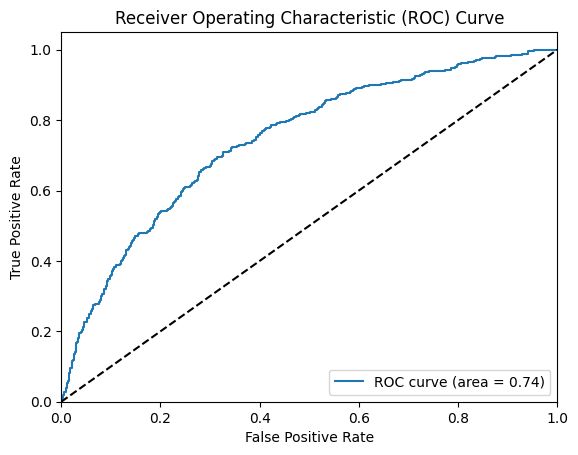

AUC Score: 0.7438566914419387


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.72, 0.6566666666666666, 0.7266666666666667, 0.6966666666666667, 0.6733333333333333, 0.6333333333333333, 0.6254180602006689, 0.6321070234113713, 0.6655518394648829, 0.6822742474916388]
Mean accuracy: 0.6712017837235228
95% confidence interval: (0.6455917589028873, 0.6968118085441583)


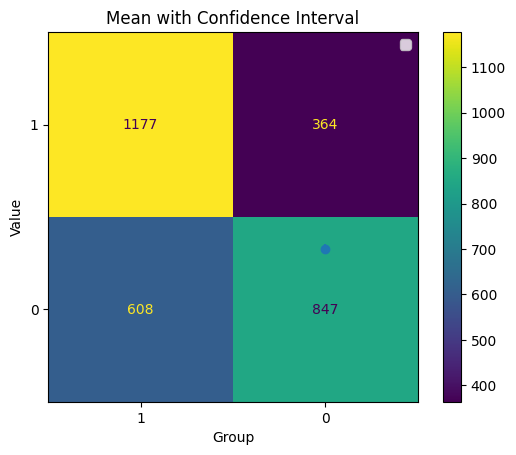

In [7]:
y_pred_prob_age_svm, y_test_age_svm, svm = ML_algorithms.model_svm(df_age, df_original)
mean_accuracy_svm_age, confidence_interval_svm_age = ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

### Outliers are transformed into values that at 20% above the mean

In [8]:
df_mean_age = outliers_utils.replace_outliers_with_above_mean_original(df_original, df_age, 'age')

In [9]:
outliers_utils.visualize_outliers_specific(df_mean_age, 'age')

no outliers detected


**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      1541
           1       0.81      0.95      0.88      1455

    accuracy                           0.87      2996
   macro avg       0.88      0.87      0.87      2996
weighted avg       0.88      0.87      0.87      2996

Node Labels:
 Annotation(0.5845, 0.954545, 'avg_glucose_level <= 162.045\nsamples = 6988\nvalue = [3527, 3461]\nclass = 0')


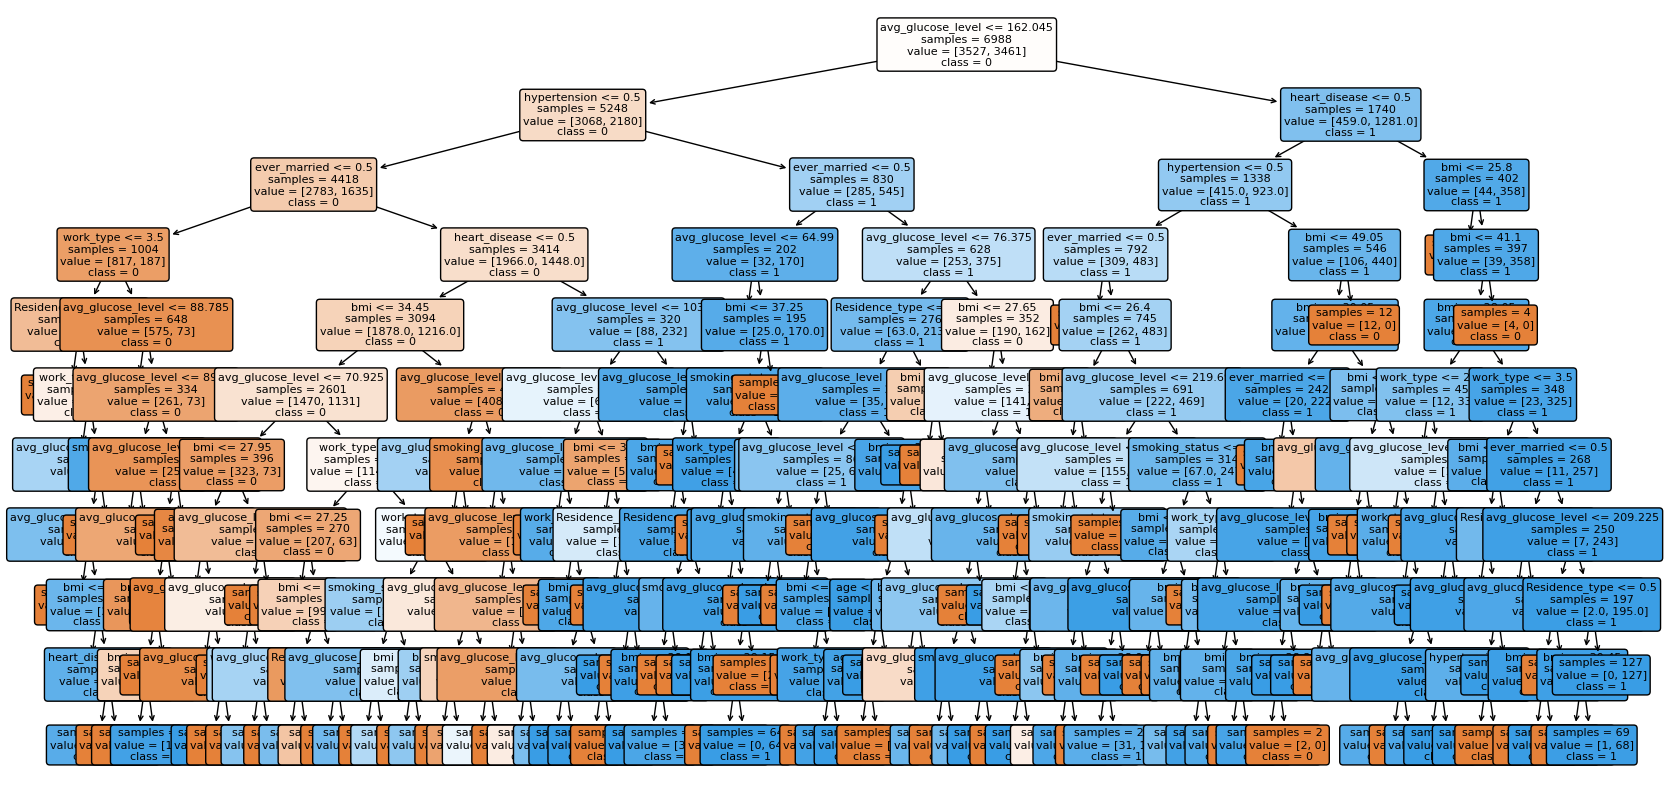

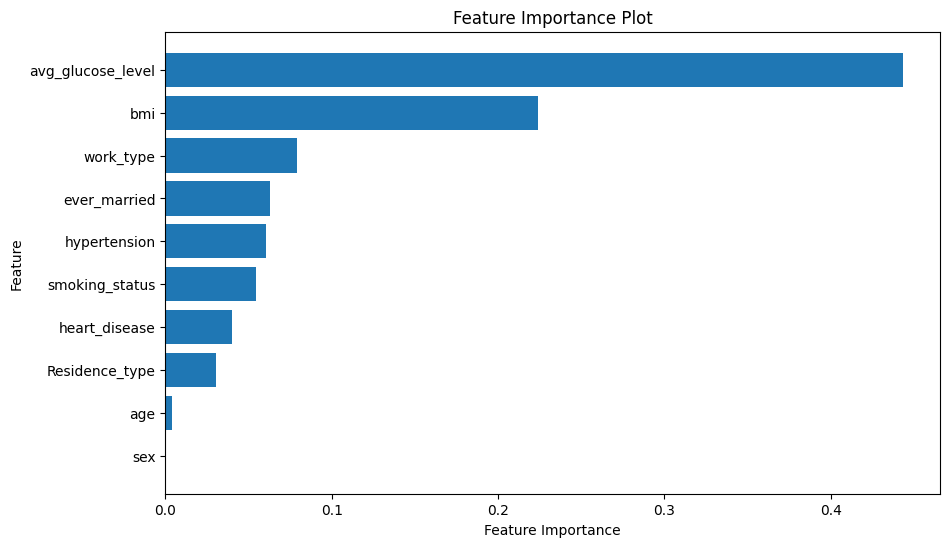

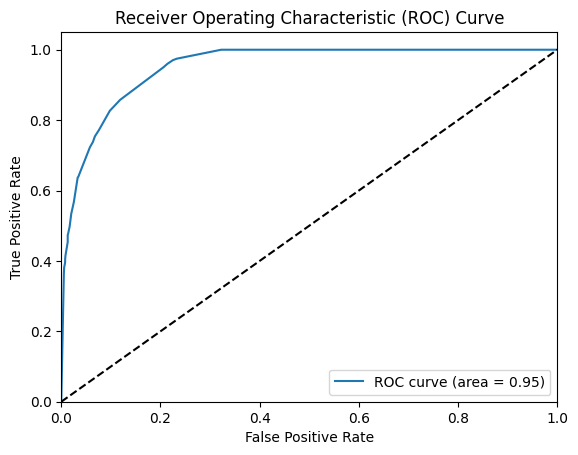

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9515149487881078
Accuracy for each fold: [0.8133333333333334, 0.7833333333333333, 0.7966666666666666, 0.8233333333333334, 0.77, 0.8133333333333334, 0.7993311036789298, 0.8695652173913043, 0.7759197324414716, 0.8394648829431438]
Mean accuracy: 0.808428093645485
95% confidence interval: (0.7866313300257183, 0.8302248572652516)


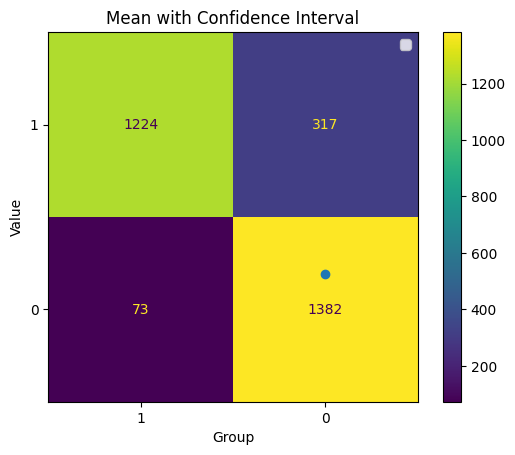

In [10]:
y_prob_dt_20_age, y_test_dt_20_age, decision_tree = ML_algorithms.model_dt(df_mean_age, df_original)
mean_accuracy_dt_20_age, confidence_interval_dt_20_age = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.66      0.76      0.71      1541
           1       0.70      0.58      0.63      1455

    accuracy                           0.67      2996
   macro avg       0.68      0.67      0.67      2996
weighted avg       0.68      0.67      0.67      2996



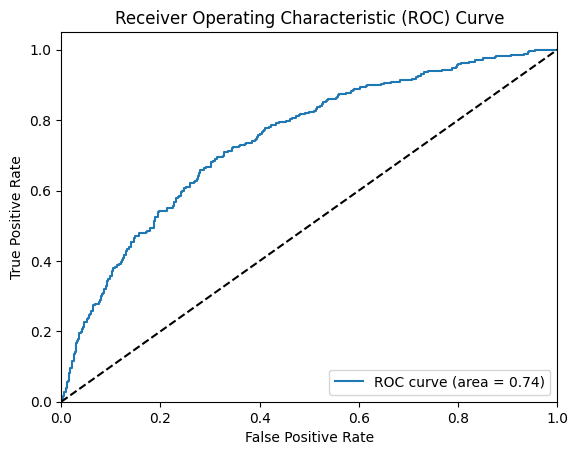

AUC Score: 0.7437862235215674


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7, 0.6766666666666666, 0.65, 0.7, 0.6933333333333334, 0.6366666666666667, 0.6555183946488294, 0.6454849498327759, 0.7190635451505016, 0.6220735785953178]
Mean accuracy: 0.6698807134894091
95% confidence interval: (0.6467437914190128, 0.6930176355598054)


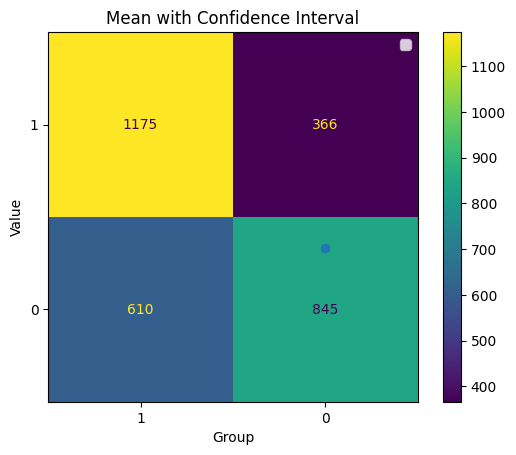

--------------------------------------


In [11]:
y_prob_svm_20_age, y_test_svm_20_age, svm = ML_algorithms.model_svm(df_mean_age, df_original)
mean_accuracy_svm_20_age, confidence_interval_svm_20_age = ML_algorithms.k_fold_cross_validation_dt(svm, df_original)
print('--------------------------------------')

## avg_glucose_level

In [12]:
df = df_original.copy()

In [13]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'avg_glucose_level')

--------------------------------------
no outliers detected


In [14]:
df_glucose = outliers_utils.outliers_replace(df, 'avg_glucose_level', 50)

Outliers found:


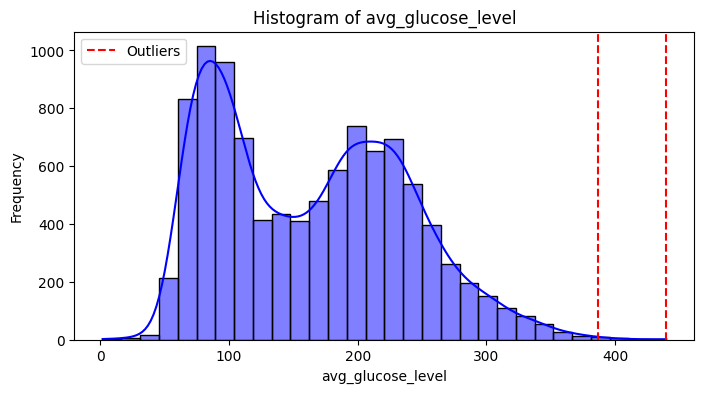

In [15]:
outliers_utils.visualize_outliers_specific(df_glucose, 'avg_glucose_level')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1541
           1       0.79      0.77      0.78      1455

    accuracy                           0.79      2996
   macro avg       0.79      0.79      0.79      2996
weighted avg       0.79      0.79      0.79      2996

Node Labels:
 Annotation(0.590781, 0.954545, 'hypertension <= 0.5\nsamples = 6988\nvalue = [3517, 3471]\nclass = 0')


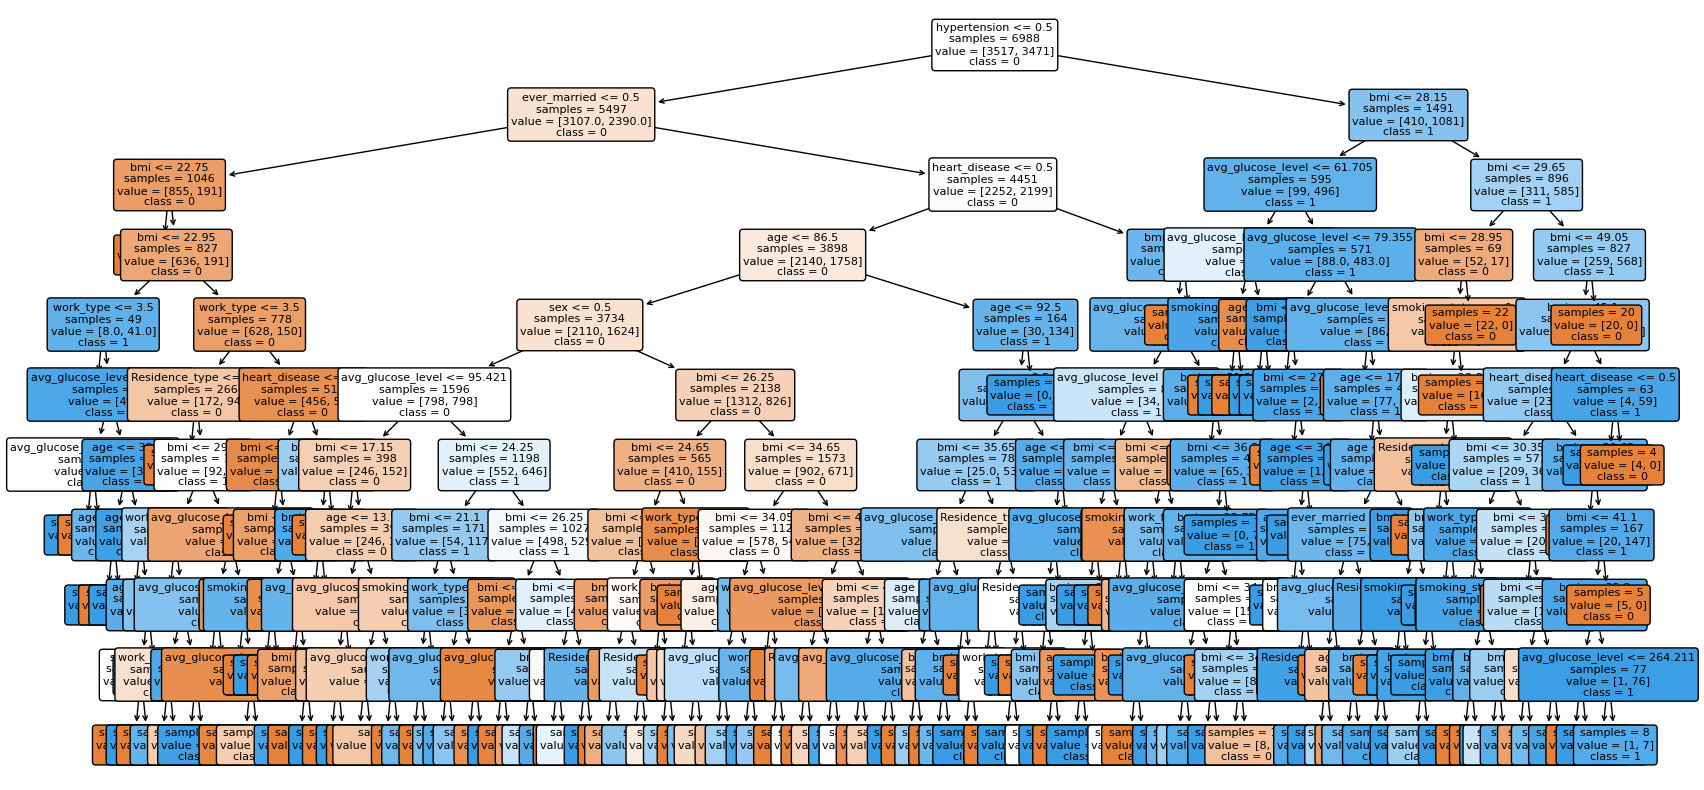

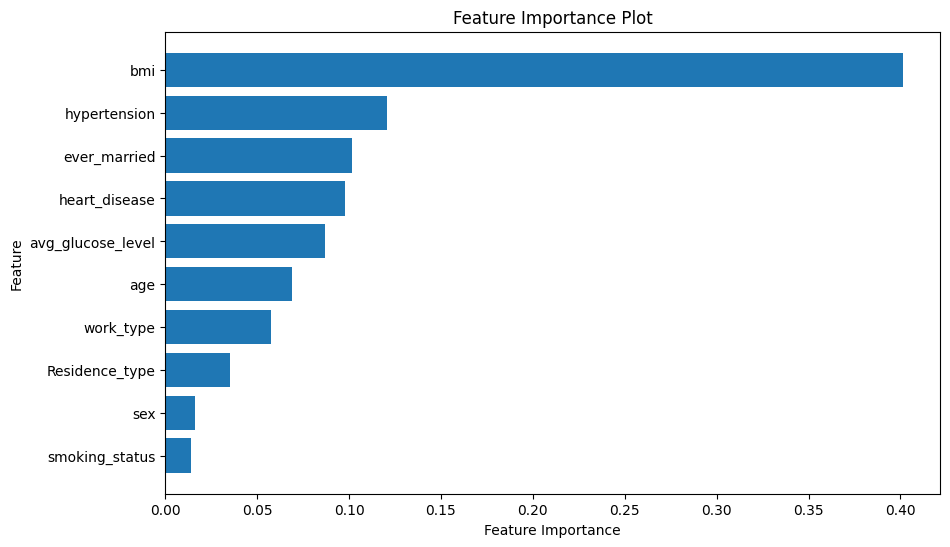

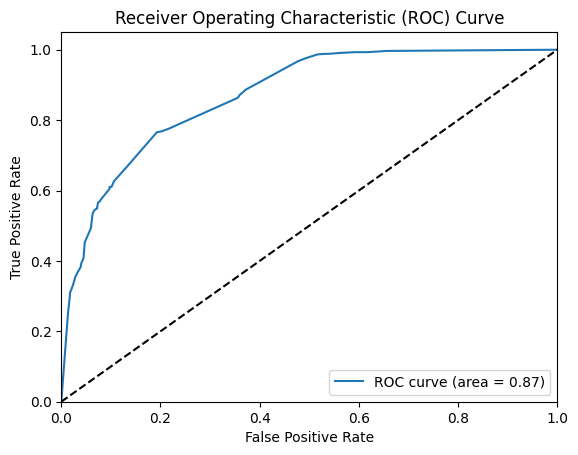

AUC Score: 0.870880469905069


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8033333333333333, 0.7766666666666666, 0.8133333333333334, 0.8266666666666667, 0.79, 0.82, 0.842809364548495, 0.7725752508361204, 0.8461538461538461, 0.7926421404682275]
Mean accuracy: 0.8084180602006688
95% confidence interval: (0.7899401126183037, 0.8268960077830338)


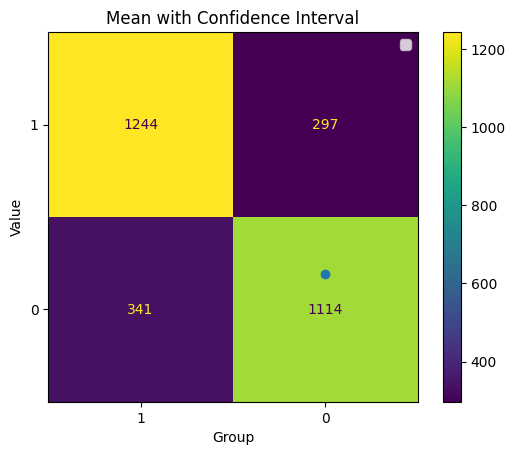

In [16]:
y_pred_prob_glucose_dt, y_test_glucose_dt, decision_tree = ML_algorithms.model_dt(df_glucose, df_original)
mean_accuracy_dt_glucose, confidence_interval_dt_glucose = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72      1541
           1       0.74      0.44      0.55      1455

    accuracy                           0.65      2996
   macro avg       0.68      0.65      0.63      2996
weighted avg       0.68      0.65      0.64      2996



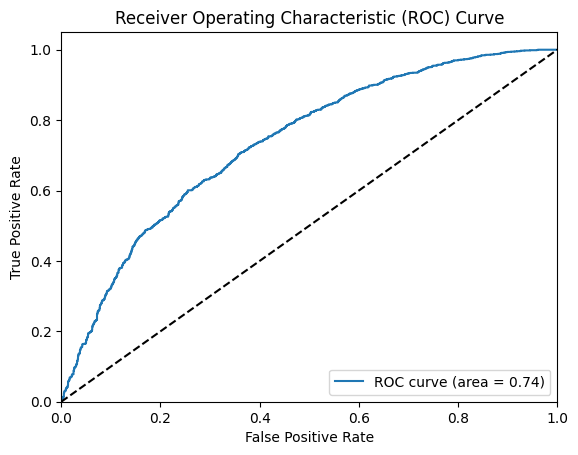

AUC Score: 0.7350464173975483


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6433333333333333, 0.68, 0.6366666666666667, 0.6766666666666666, 0.6866666666666666, 0.6966666666666667, 0.6421404682274248, 0.6956521739130435, 0.6989966555183946, 0.5986622073578596]
Mean accuracy: 0.6655451505016723
95% confidence interval: (0.6415558854810492, 0.6895344155222953)


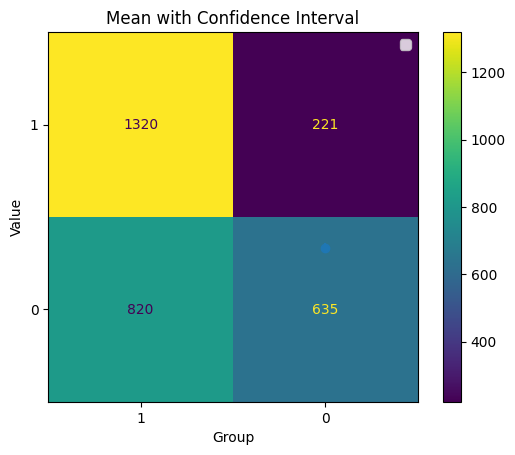

In [17]:
y_pred_prob_glucose_svm, y_test_glucose_svm, svm = ML_algorithms.model_svm(df_glucose, df_original)
mean_accuracy_svm_glucose, confidence_interval_svm_glucose = ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

### Outliers are transformed into values that at 20% above the mean

In [18]:
df_mean_glucose = outliers_utils.replace_outliers_with_above_mean_original(df_original, df_glucose, 'avg_glucose_level')

Outliers found:


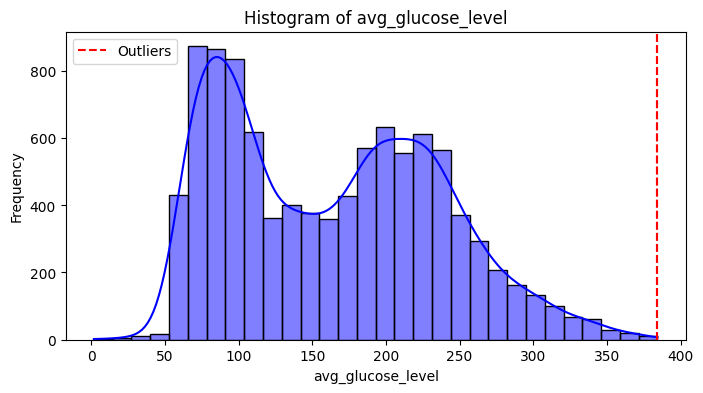

In [19]:
outliers_utils.visualize_outliers_specific(df_mean_glucose, 'avg_glucose_level')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1541
           1       0.79      0.77      0.78      1455

    accuracy                           0.79      2996
   macro avg       0.79      0.79      0.79      2996
weighted avg       0.79      0.79      0.79      2996

Node Labels:
 Annotation(0.590781, 0.954545, 'hypertension <= 0.5\nsamples = 6988\nvalue = [3517, 3471]\nclass = 0')


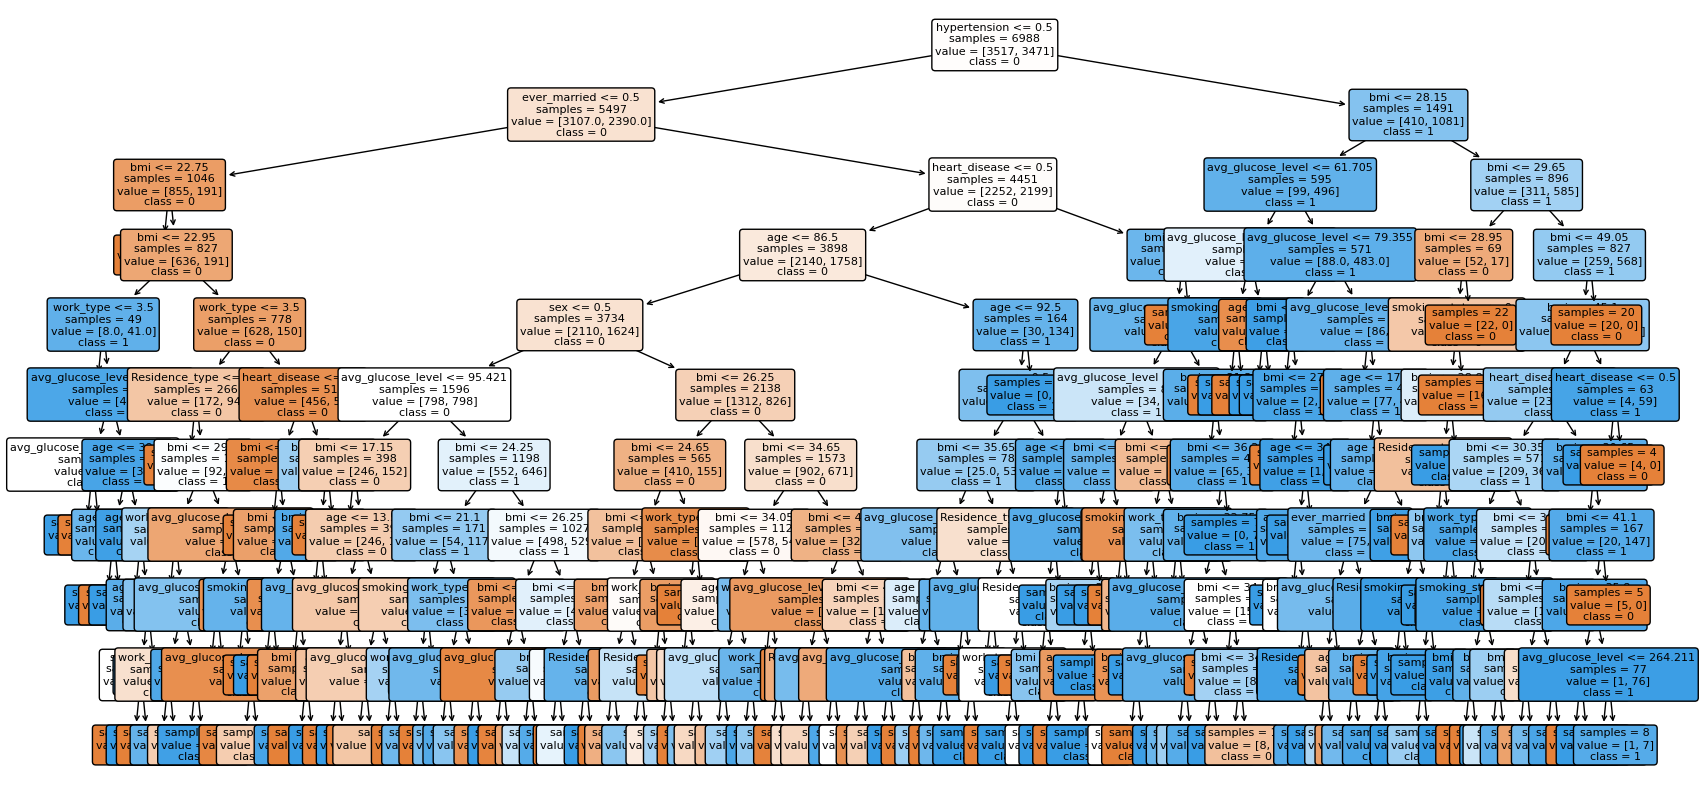

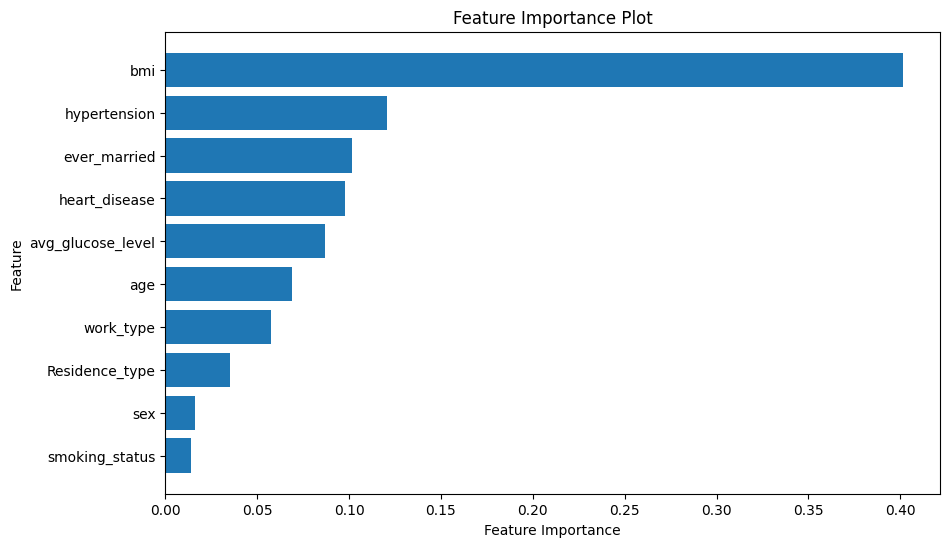

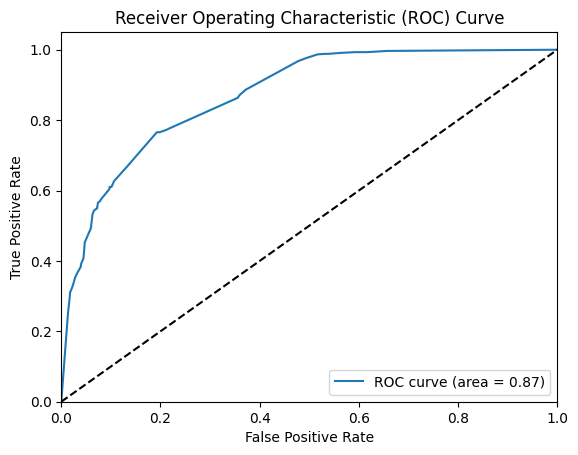

AUC Score: 0.8708632989244722


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7666666666666667, 0.7766666666666666, 0.8366666666666667, 0.79, 0.79, 0.7933333333333333, 0.8160535117056856, 0.7892976588628763, 0.802675585284281, 0.7993311036789298]
Mean accuracy: 0.7960691192865107
95% confidence interval: (0.7820231092880455, 0.8101151292849759)


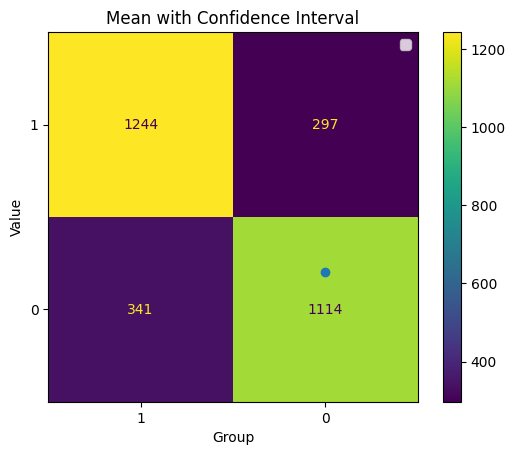

In [20]:
y_prob_dt_20_glucose, y_test_dt_20_glucose, decision_tree = ML_algorithms.model_dt(df_mean_glucose, df_original)
mean_accuracy_dt_20_glucose, confidence_interval_dt_20_glucose = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72      1541
           1       0.74      0.44      0.55      1455

    accuracy                           0.65      2996
   macro avg       0.68      0.65      0.63      2996
weighted avg       0.68      0.65      0.64      2996



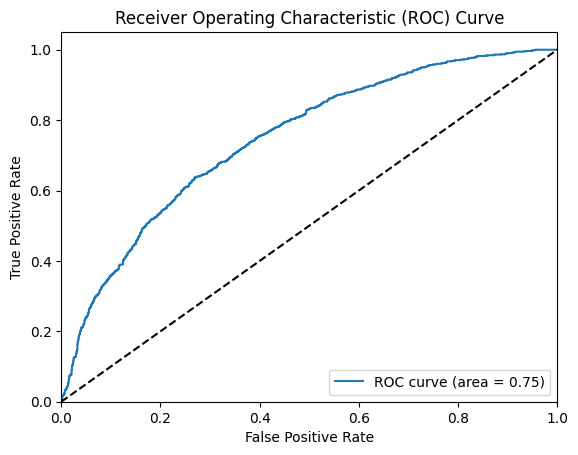

AUC Score: 0.7468511320582207


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6866666666666666, 0.6433333333333333, 0.67, 0.67, 0.71, 0.6466666666666666, 0.6387959866220736, 0.6387959866220736, 0.6555183946488294, 0.68561872909699]
Mean accuracy: 0.6645395763656633
95% confidence interval: (0.6472847658222248, 0.6817943869091018)


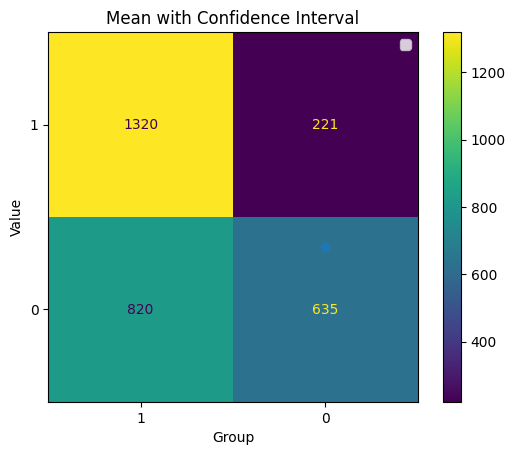

--------------------------------------


In [21]:
y_prob_svm_20_glucose, y_test_svm_20_glucose, svm = ML_algorithms.model_svm(df_mean_glucose, df_original)
mean_accuracy_svm_20_glucose, confidence_interval_svm_20_glucose = ML_algorithms.k_fold_cross_validation_dt(svm, df_original)
print('--------------------------------------')

## bmi

In [22]:
df = df_original.copy()

--------------------------------------
Outliers found:


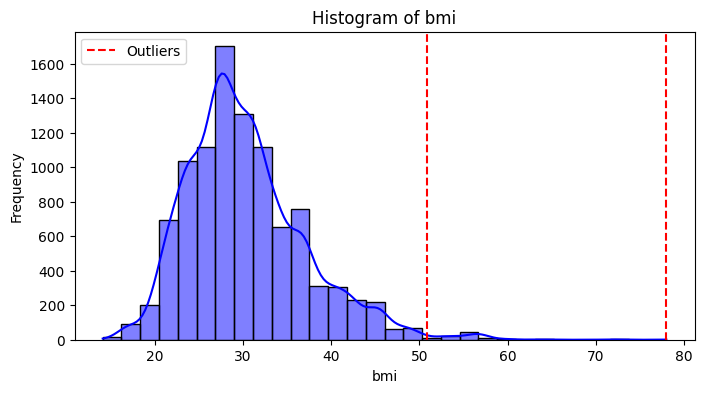

In [23]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'bmi')

In [24]:
df_bmi = outliers_utils.outliers_replace(df, 'bmi', 50)

Outliers found:


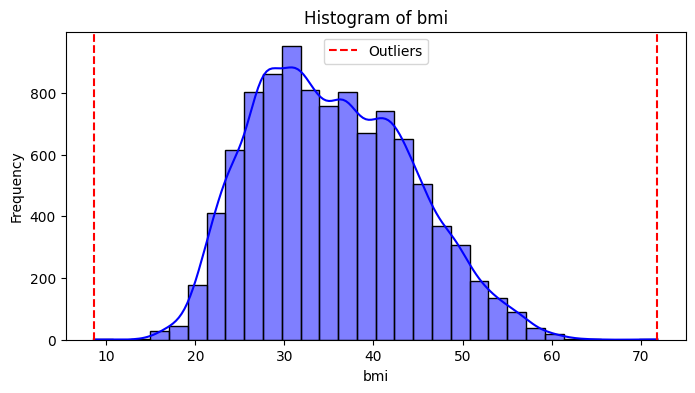

In [25]:
outliers_utils.visualize_outliers_specific(df_bmi, 'bmi')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.90      0.82      0.85      1541
           1       0.82      0.90      0.86      1455

    accuracy                           0.86      2996
   macro avg       0.86      0.86      0.86      2996
weighted avg       0.86      0.86      0.86      2996

Node Labels:
 Annotation(0.618906, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6988\nvalue = [3515, 3473]\nclass = 0')


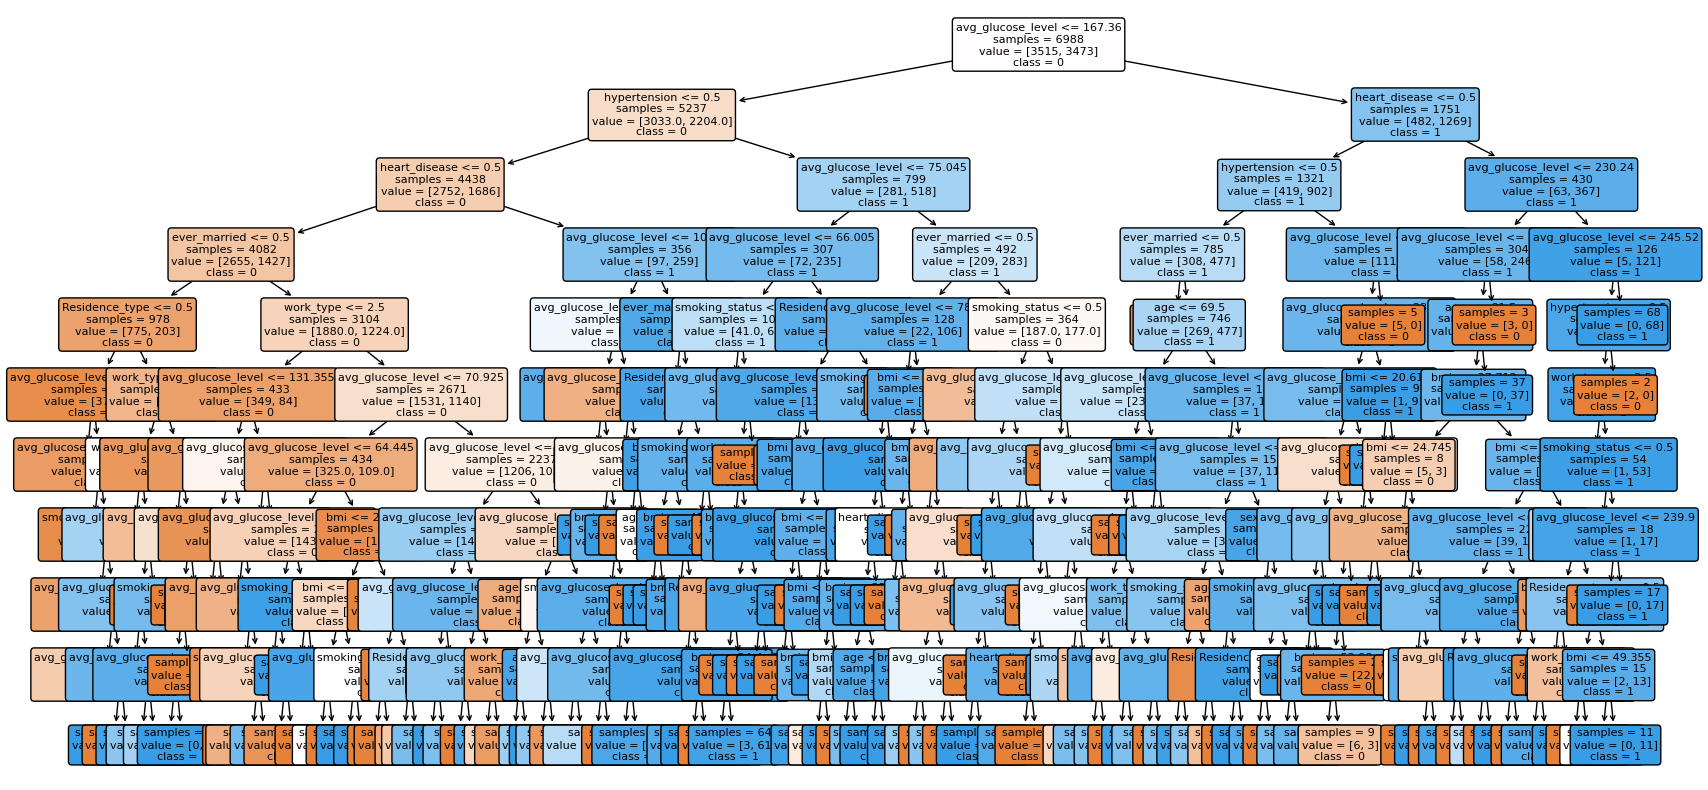

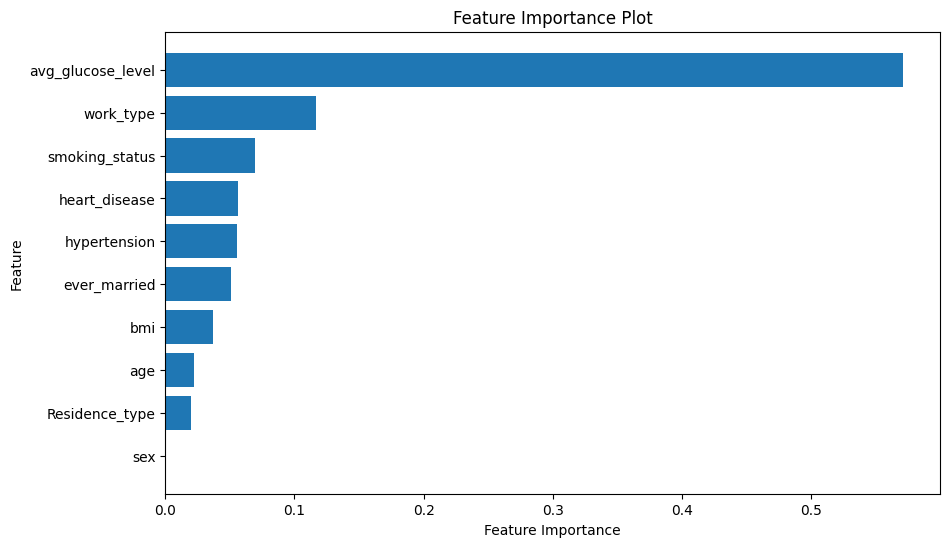

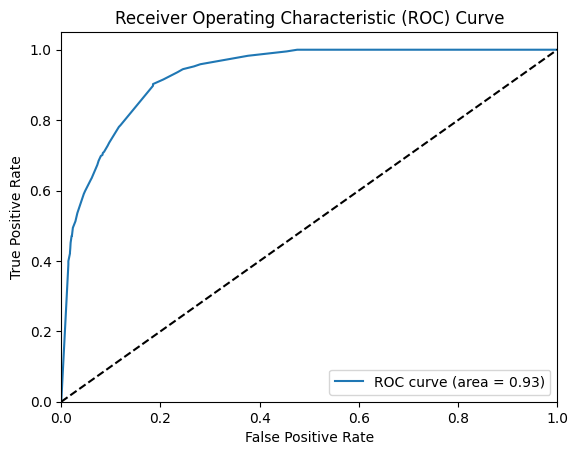

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9303721196795047
Accuracy for each fold: [0.8033333333333333, 0.78, 0.83, 0.7866666666666666, 0.7933333333333333, 0.7866666666666666, 0.8260869565217391, 0.8260869565217391, 0.8394648829431438, 0.8127090301003345]
Mean accuracy: 0.8084347826086956
95% confidence interval: (0.7932042112357156, 0.8236653539816756)


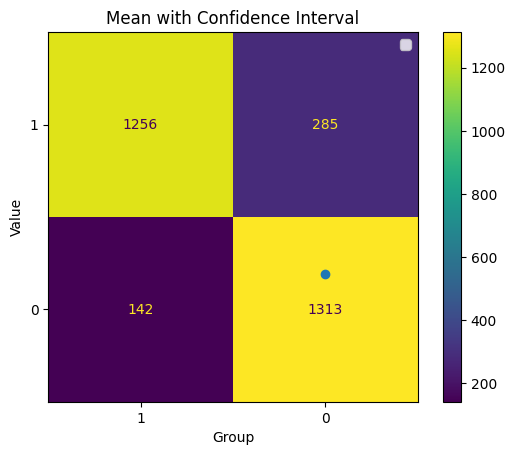

In [26]:
y_pred_prob_bmi_dt, y_test_bmi_dt, decision_tree = ML_algorithms.model_dt(df_bmi, df_original)
mean_accuracy_dt_bmi, confidence_interval_dt_bmi = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72      1541
           1       0.74      0.44      0.55      1455

    accuracy                           0.65      2996
   macro avg       0.68      0.65      0.63      2996
weighted avg       0.68      0.65      0.64      2996



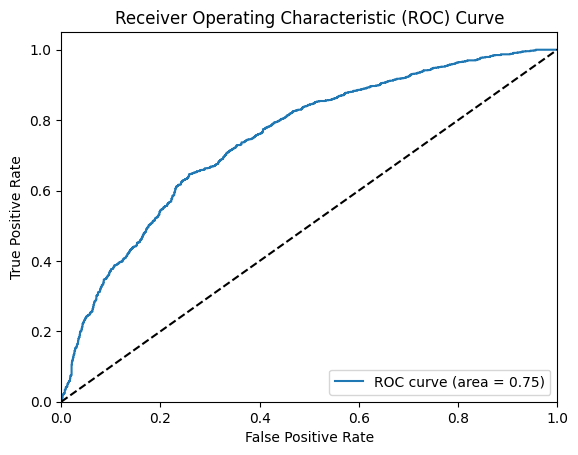

AUC Score: 0.7494352531381641


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6966666666666667, 0.71, 0.6166666666666667, 0.72, 0.68, 0.6833333333333333, 0.6421404682274248, 0.6655518394648829, 0.6220735785953178, 0.6688963210702341]
Mean accuracy: 0.6705328874024525
95% confidence interval: (0.6454958575428155, 0.6955699172620896)


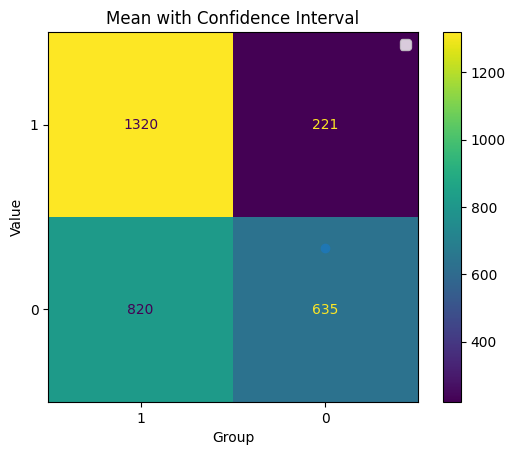

In [27]:
y_pred_prob_bmi_svm, y_test_bmi_svm, svm = ML_algorithms.model_svm(df_bmi, df_original)
mean_accuracy_svm_bmi, confidence_interval_svm_bmi = ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

### Outliers are transformed into values that at 20% above the mean

In [28]:
df_mean_bmi = outliers_utils.replace_outliers_with_above_mean_original(df_original, df_bmi, 'bmi')

In [29]:
outliers_utils.visualize_outliers_specific(df_mean_bmi, 'age')

no outliers detected


**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.90      0.82      0.85      1541
           1       0.82      0.90      0.86      1455

    accuracy                           0.86      2996
   macro avg       0.86      0.86      0.86      2996
weighted avg       0.86      0.86      0.86      2996

Node Labels:
 Annotation(0.618906, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6988\nvalue = [3515, 3473]\nclass = 0')


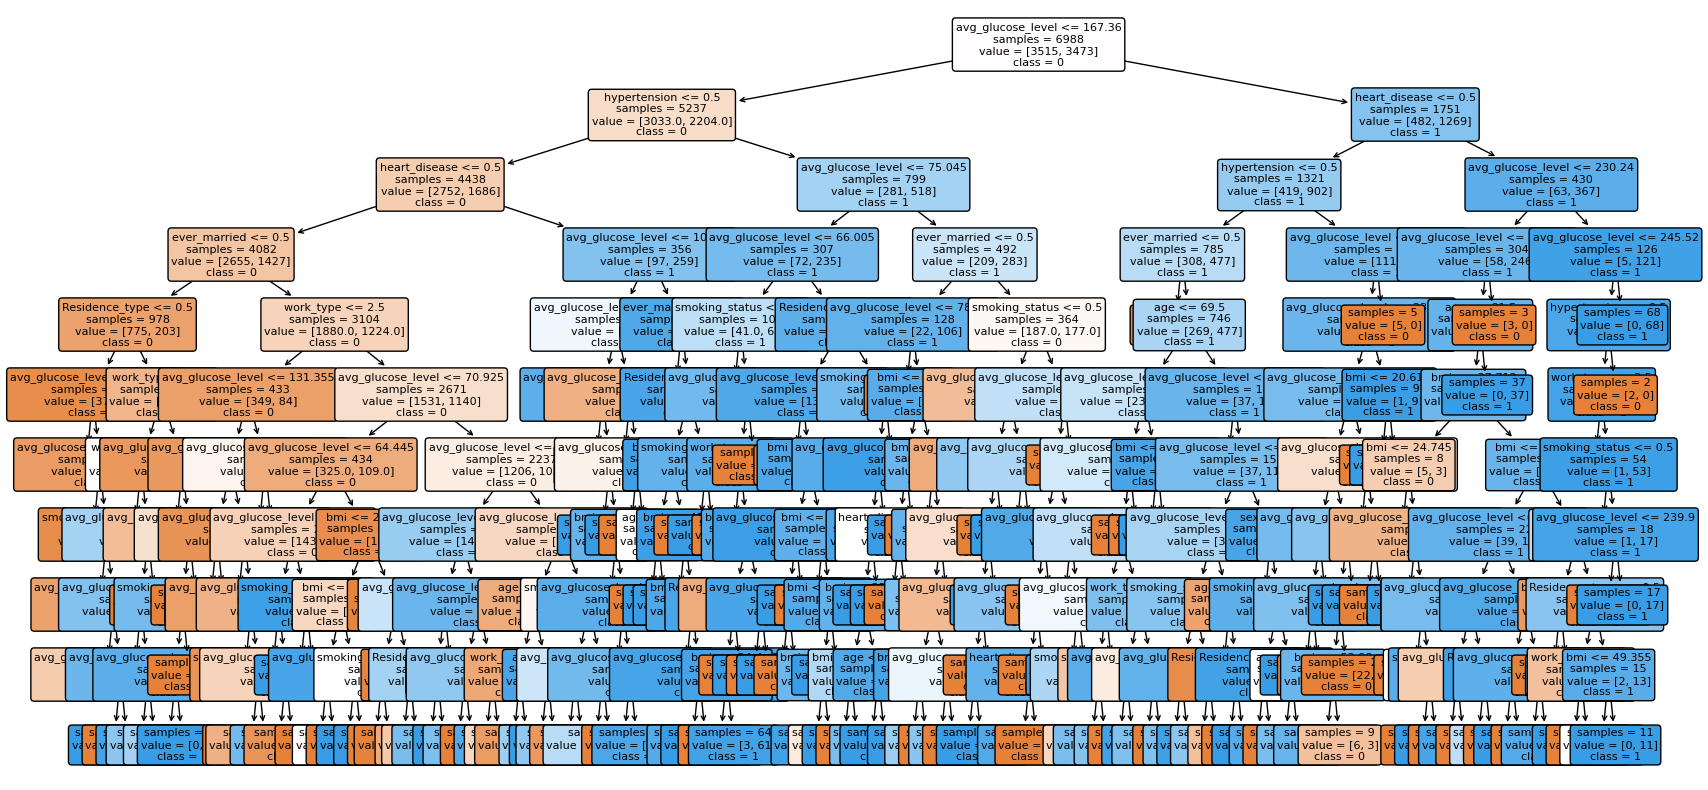

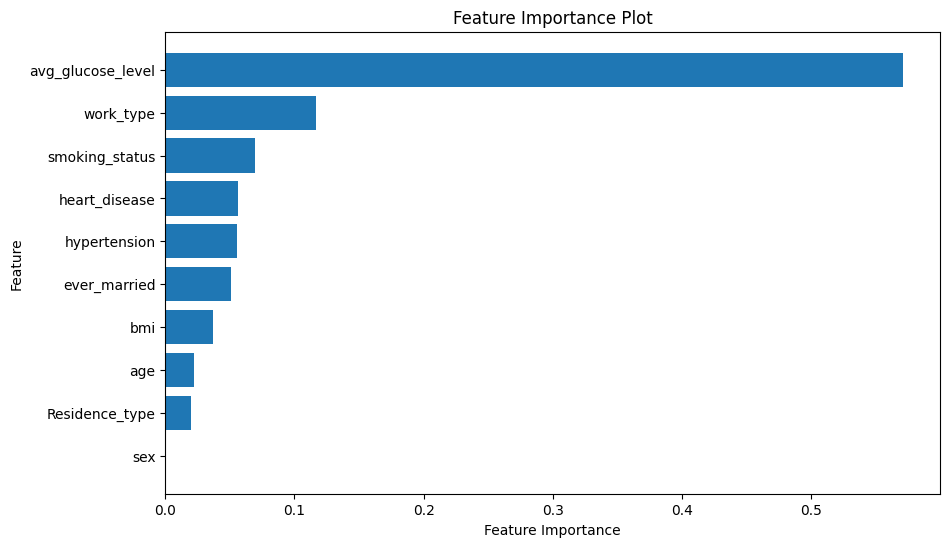

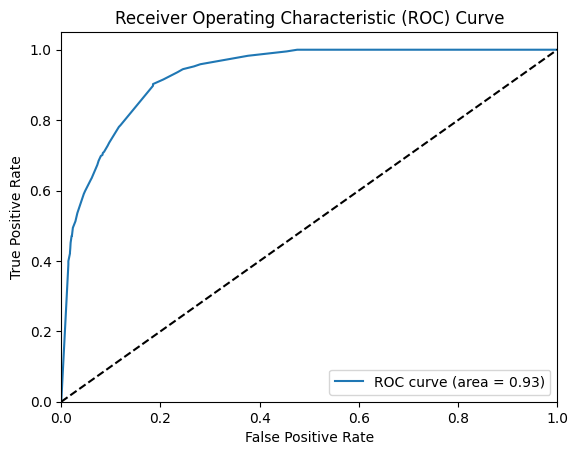

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9303721196795047
Accuracy for each fold: [0.8366666666666667, 0.8233333333333334, 0.81, 0.83, 0.8366666666666667, 0.76, 0.802675585284281, 0.7959866220735786, 0.8127090301003345, 0.8060200668896321]
Mean accuracy: 0.8114057971014492
95% confidence interval: (0.7949656601785386, 0.8278459340243598)


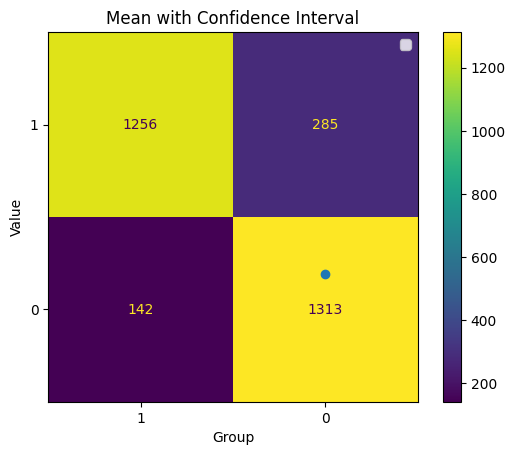

In [30]:
y_prob_dt_20_bmi, y_test_dt_20_bmi, decision_tree = ML_algorithms.model_dt(df_mean_bmi, df_original)
mean_accuracy_dt_20_bmi, confidence_interval_dt_20_bmi = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72      1541
           1       0.74      0.44      0.55      1455

    accuracy                           0.65      2996
   macro avg       0.68      0.65      0.63      2996
weighted avg       0.68      0.65      0.64      2996



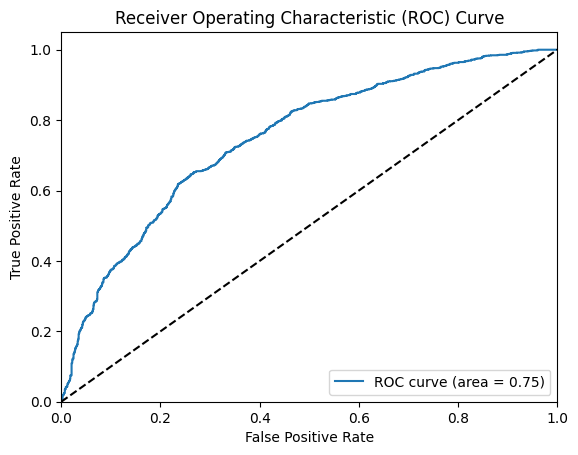

AUC Score: 0.7488046098507909


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6866666666666666, 0.72, 0.6866666666666666, 0.6466666666666666, 0.6533333333333333, 0.6833333333333333, 0.6688963210702341, 0.6956521739130435, 0.6688963210702341, 0.5919732441471572]
Mean accuracy: 0.6702084726867336
95% confidence interval: (0.6454234625800281, 0.694993482793439)


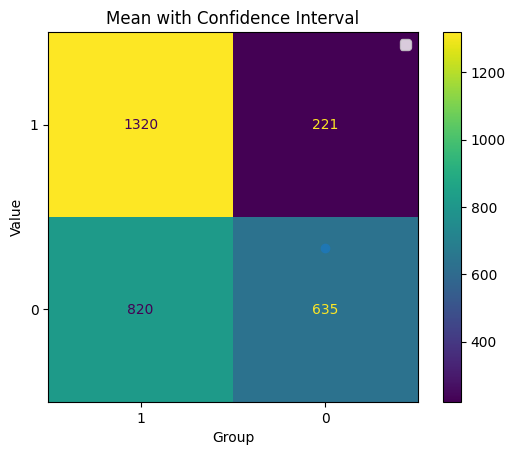

--------------------------------------


In [31]:
y_prob_svm_20_bmi, y_test_svm_20_bmi, svm = ML_algorithms.model_svm(df_mean_bmi, df_original)
mean_accuracy_svm_20_bmi, confidence_interval_svm_20_bmi = ML_algorithms.k_fold_cross_validation_dt(svm, df_original)
print('--------------------------------------')

# Categorical

In [32]:
df = df_original.copy()

--------------------------------------
Value counts:
work_type
4    6203
3    2287
2    1345
1     126
0      23
Name: count, dtype: int64
Outliers detected: [4, 3, 2, 1, 0]
Outliers found:


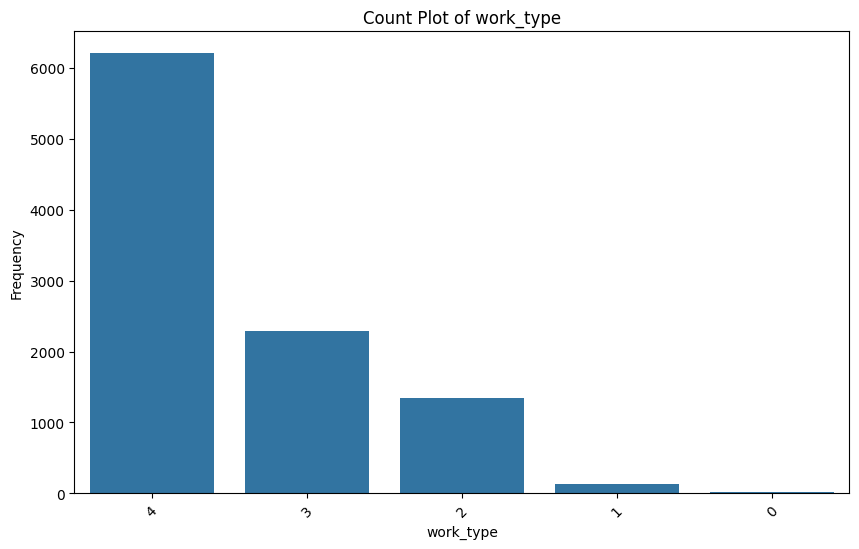

In [33]:
print('--------------------------------------')
outliers_utils.visualize_outliers_categorical(df, 'work_type')

In [34]:
df_categorical = outliers_utils.add_categorical_outliers('work_type', 50, df)

Valore meno frequente:  0


Value counts:
work_type
0    5003
4    3120
3    1144
2     661
1      56
Name: count, dtype: int64
Outliers detected: [0, 4, 3, 2, 1]
Outliers found:


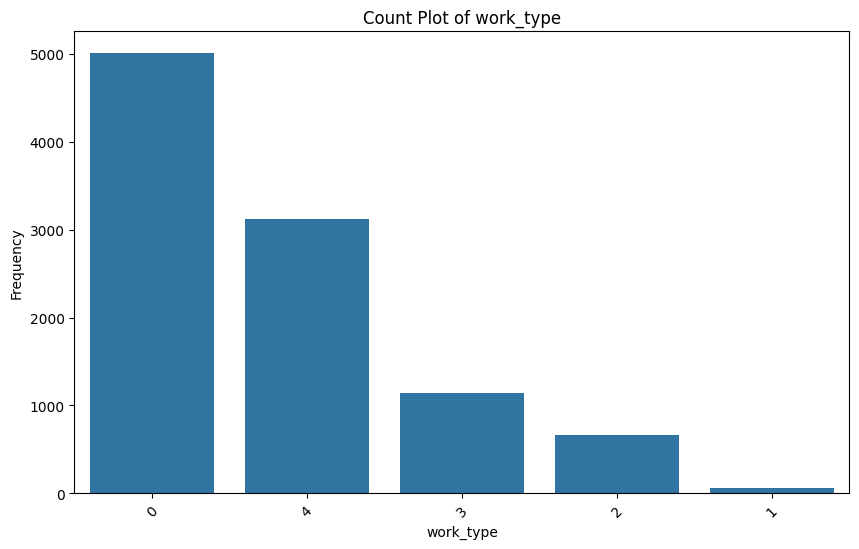

In [35]:
outliers_utils.visualize_outliers_categorical(df_categorical, 'work_type')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.87      0.79      0.82      1541
           1       0.79      0.87      0.83      1455

    accuracy                           0.83      2996
   macro avg       0.83      0.83      0.83      2996
weighted avg       0.83      0.83      0.83      2996

Node Labels:
 Annotation(0.622893, 0.954545, 'avg_glucose_level <= 170.64\nsamples = 6988\nvalue = [3458.0, 3530.0]\nclass = 1')


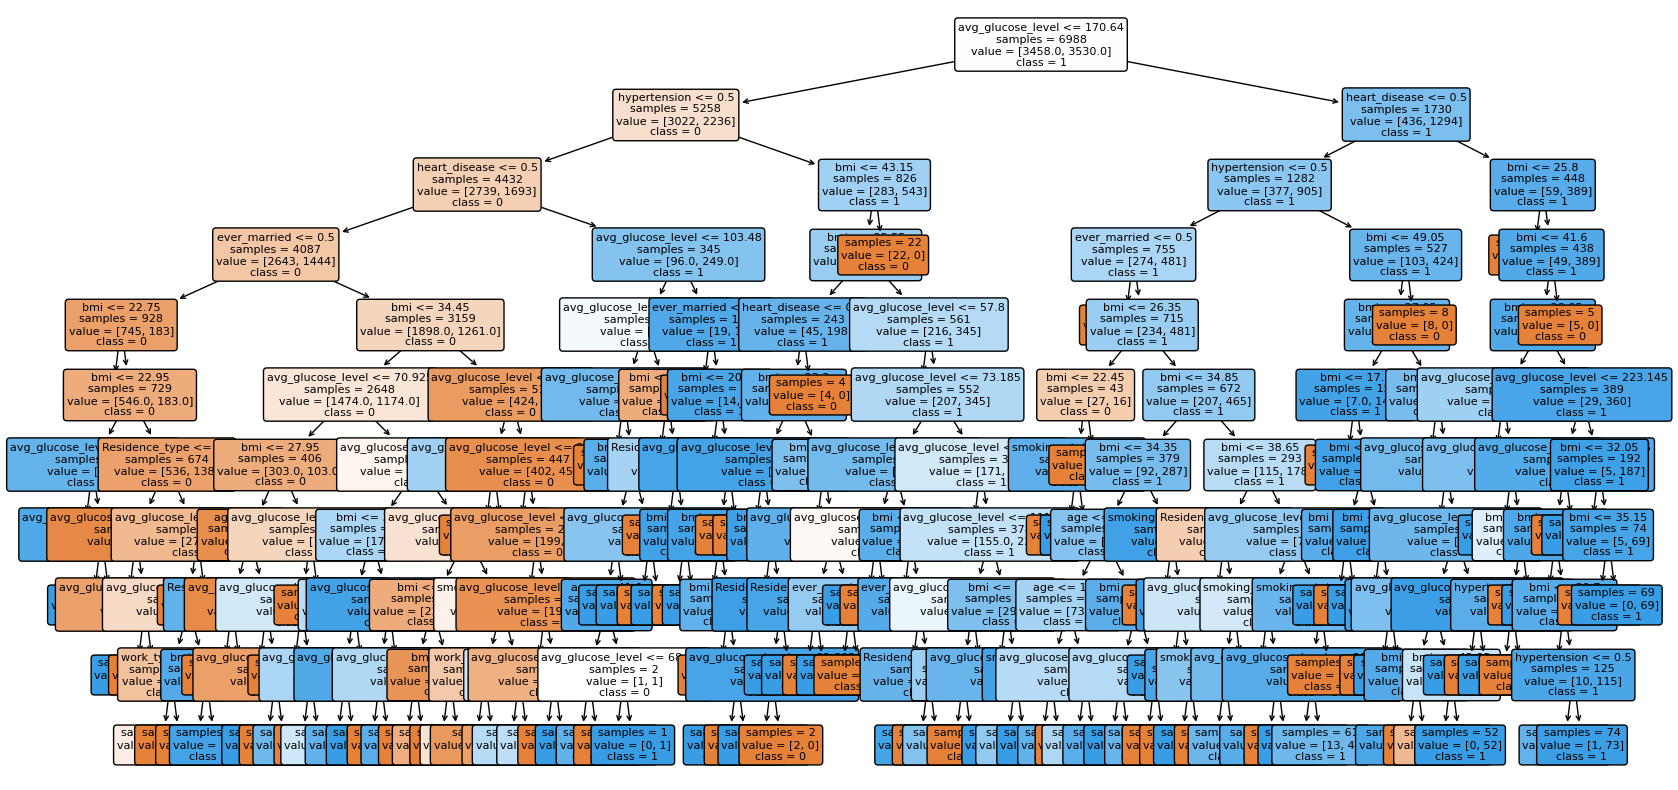

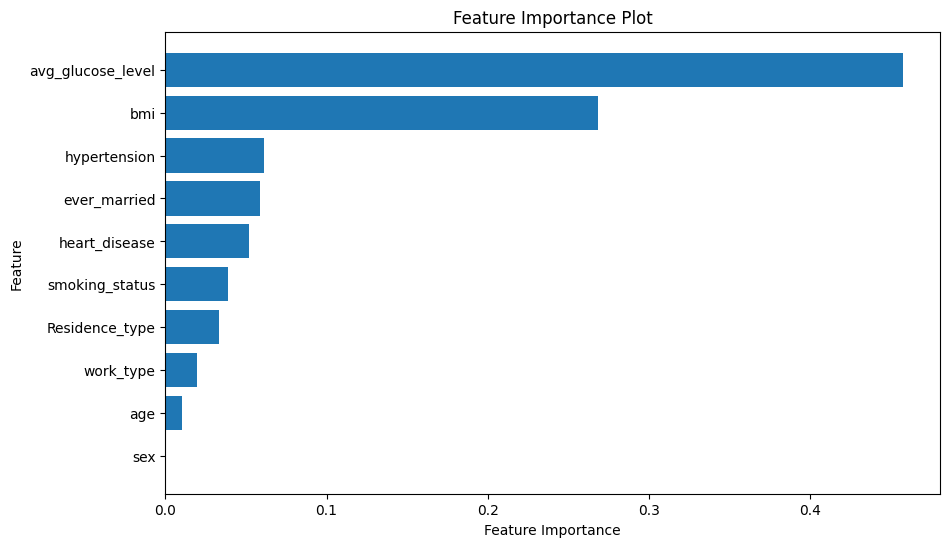

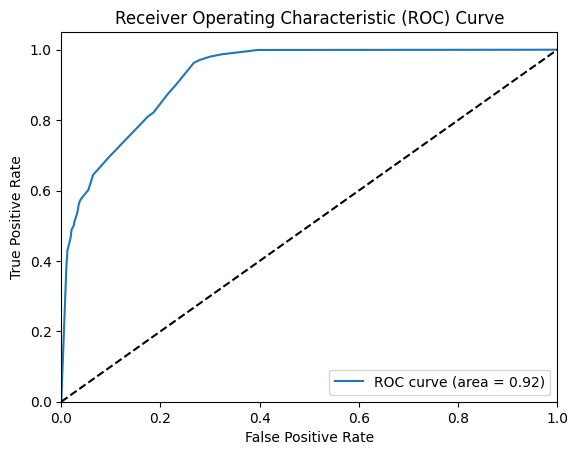

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9244905013257335
Accuracy for each fold: [0.79, 0.8166666666666667, 0.8233333333333334, 0.8333333333333334, 0.7933333333333333, 0.7533333333333333, 0.7993311036789298, 0.7993311036789298, 0.8127090301003345, 0.7959866220735786]
Mean accuracy: 0.8017357859531774
95% confidence interval: (0.7859115559420156, 0.8175600159643392)


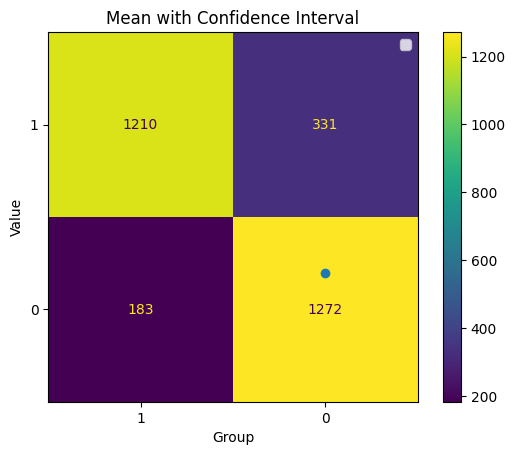

In [36]:
y_pred_prob_categorical_dt, y_test_categorical_dt, decision_tree = ML_algorithms.model_dt(df_categorical, df_original)
mean_accuracy_dt_categorical, confidence_interval_dt_categorical = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.65      0.80      0.71      1541
           1       0.72      0.54      0.62      1455

    accuracy                           0.67      2996
   macro avg       0.68      0.67      0.67      2996
weighted avg       0.68      0.67      0.67      2996



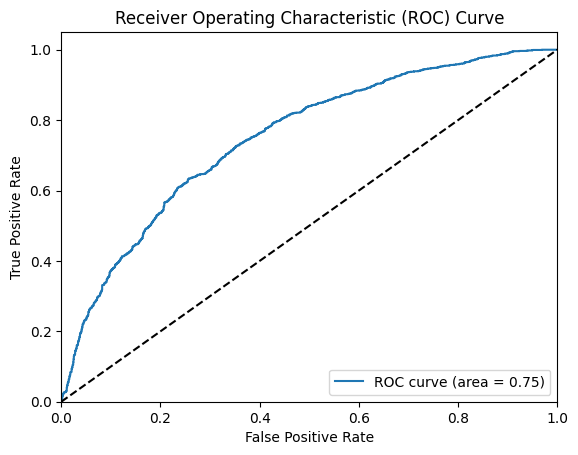

AUC Score: 0.7489459916910295


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6733333333333333, 0.7166666666666667, 0.6966666666666667, 0.6533333333333333, 0.6633333333333333, 0.68, 0.6889632107023411, 0.6822742474916388, 0.6722408026755853, 0.5919732441471572]
Mean accuracy: 0.6718784838350056
95% confidence interval: (0.64816429565061, 0.6955926720194012)


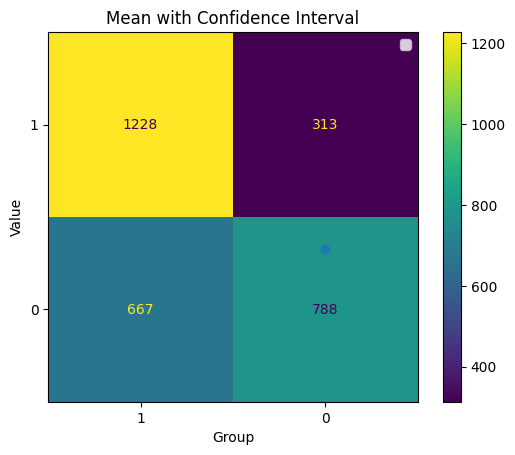

--------------------------------------


In [37]:
y_pred_prob_categorical_svm, y_test_categorical_svm, svm = ML_algorithms.model_svm(df_categorical, df_original)
mean_accuracy_svm_categorical, confidence_interval_svm_categorical = ML_algorithms.k_fold_cross_validation_dt(svm,df_original)

print('--------------------------------------')

## Conclusion

### ROC Curve 

**Decision Tree**

Decision Tree


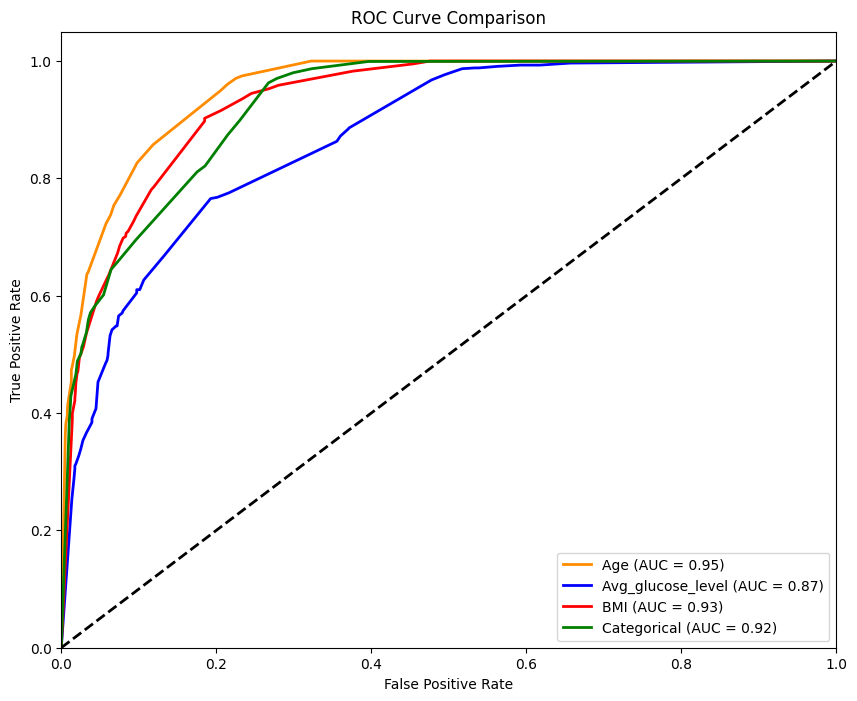

In [38]:
roc_results = [
    (y_pred_prob_age_dt, y_test_age_dt, 'Age'),
    (y_pred_prob_glucose_dt, y_test_glucose_dt, 'Avg_glucose_level'),
    (y_pred_prob_bmi_dt, y_test_bmi_dt, 'BMI'),
    (y_pred_prob_categorical_dt, y_test_categorical_dt, 'Categorical')
]

print('Decision Tree')
# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

**Decision Tree - substitution of outliers**

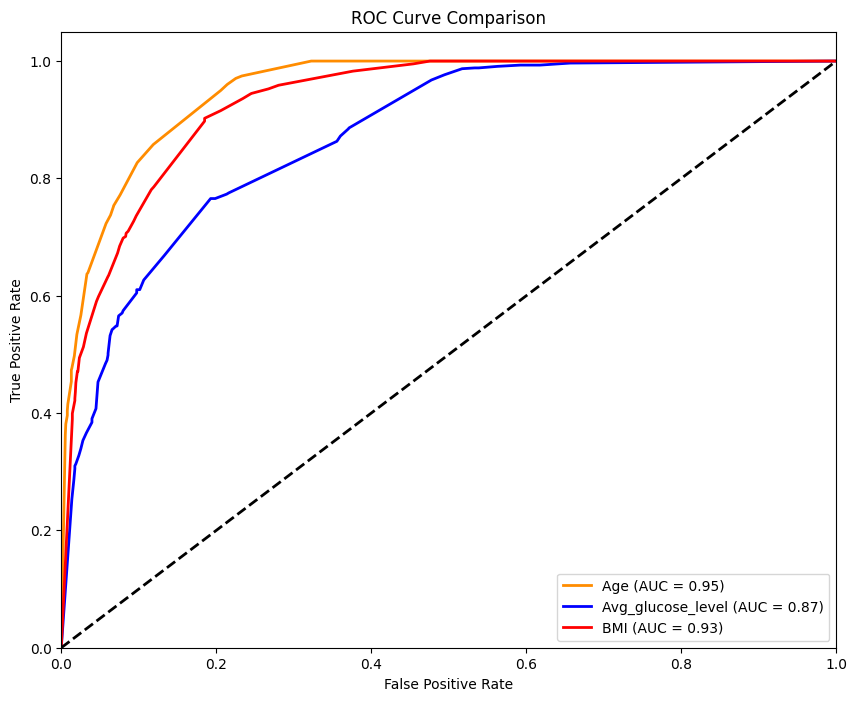

In [39]:
roc_results = [
    (y_prob_dt_20_age, y_test_dt_20_age, 'Age'),
    (y_prob_dt_20_glucose, y_test_dt_20_glucose, 'Avg_glucose_level'),
    (y_prob_dt_20_bmi, y_test_dt_20_bmi, 'BMI')
]
# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

**Support Vector Machine**

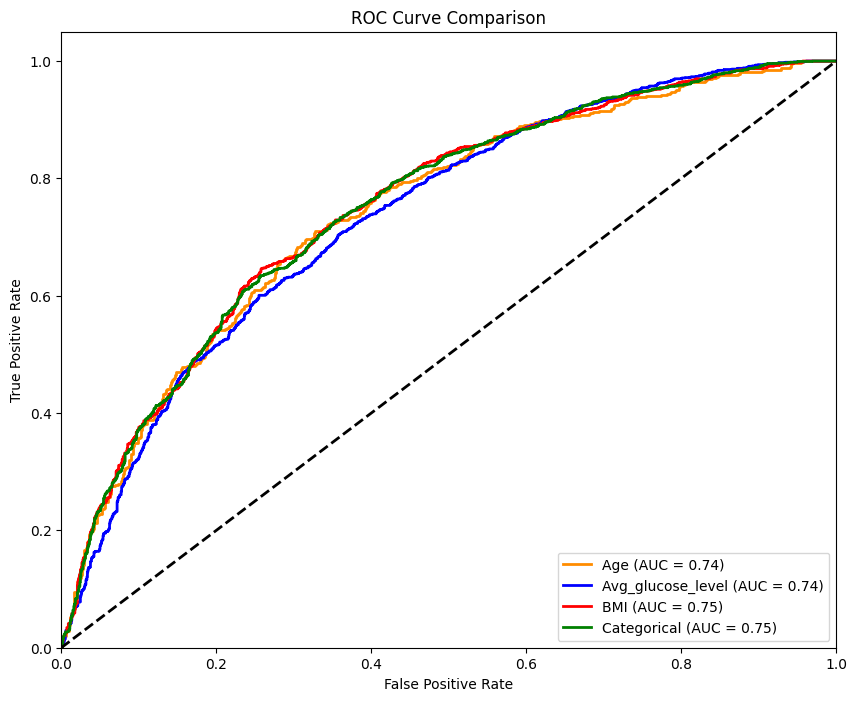

In [40]:
roc_results = [
    (y_pred_prob_age_svm, y_test_age_svm, 'Age'),
    (y_pred_prob_glucose_svm, y_test_glucose_svm, 'Avg_glucose_level'),
    (y_pred_prob_bmi_svm, y_test_bmi_svm, 'BMI'),
    (y_pred_prob_categorical_svm, y_test_categorical_svm, 'Categorical')
]

# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

**Support Vector Machine - substitution of outliers**

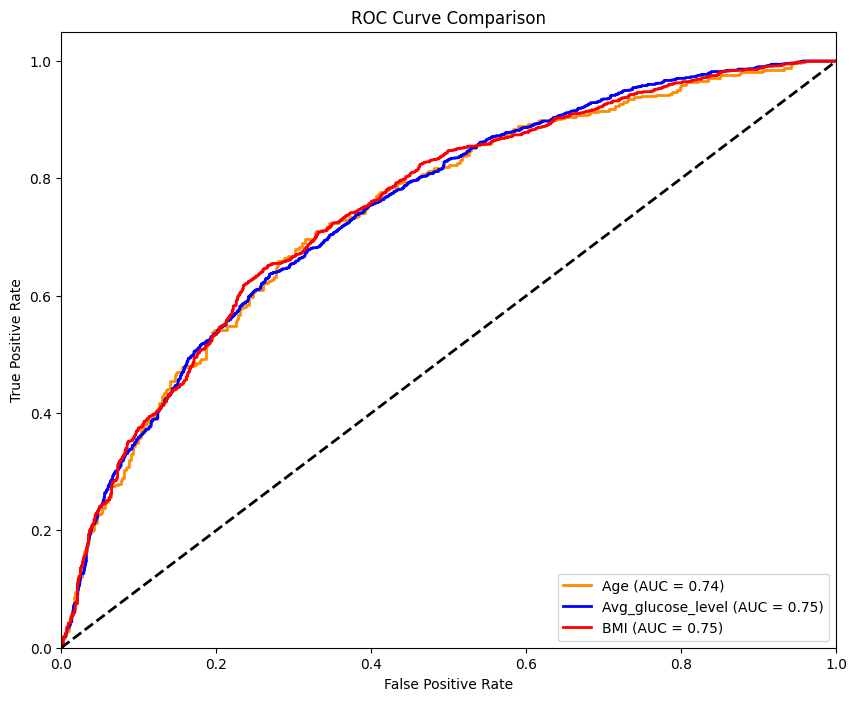

In [41]:
roc_results = [
    (y_prob_svm_20_age, y_test_svm_20_age, 'Age'),
    (y_prob_svm_20_glucose, y_test_svm_20_glucose, 'Avg_glucose_level'),
    (y_prob_svm_20_bmi, y_test_svm_20_bmi, 'BMI')
]
# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

### Confidence Interval

**Decision Tree**

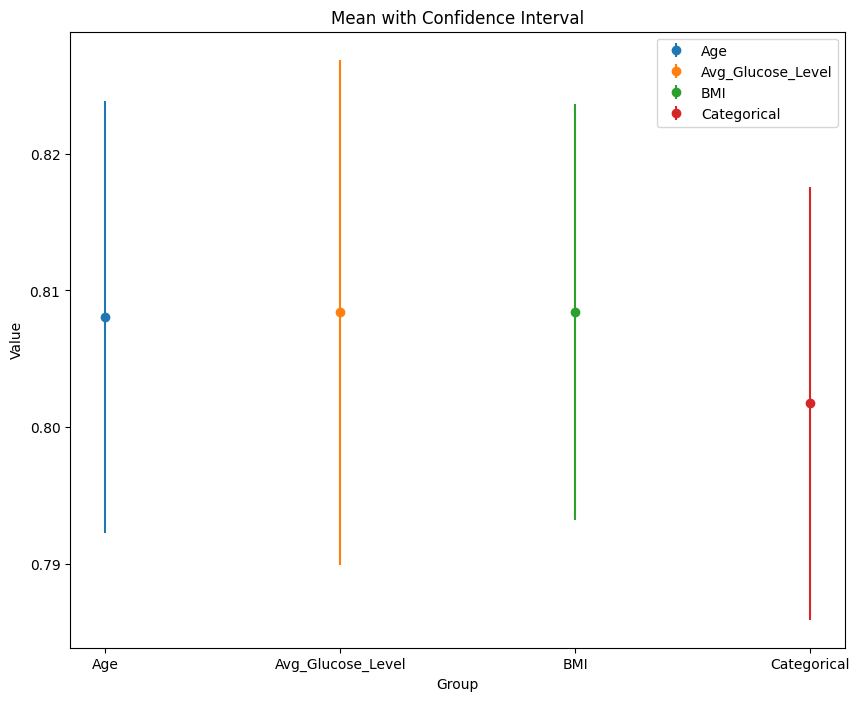

In [42]:
model_results = [
    ('Age', mean_accuracy_dt_age, confidence_interval_dt_age),
    ('Avg_Glucose_Level', mean_accuracy_dt_glucose, confidence_interval_dt_glucose),
    ('BMI', mean_accuracy_dt_bmi, confidence_interval_dt_bmi),
    ('Categorical', mean_accuracy_dt_categorical, confidence_interval_dt_categorical)
]
ML_algorithms.plot_confidence_intervals(model_results)

**Decision Tree - substitution of outliers**

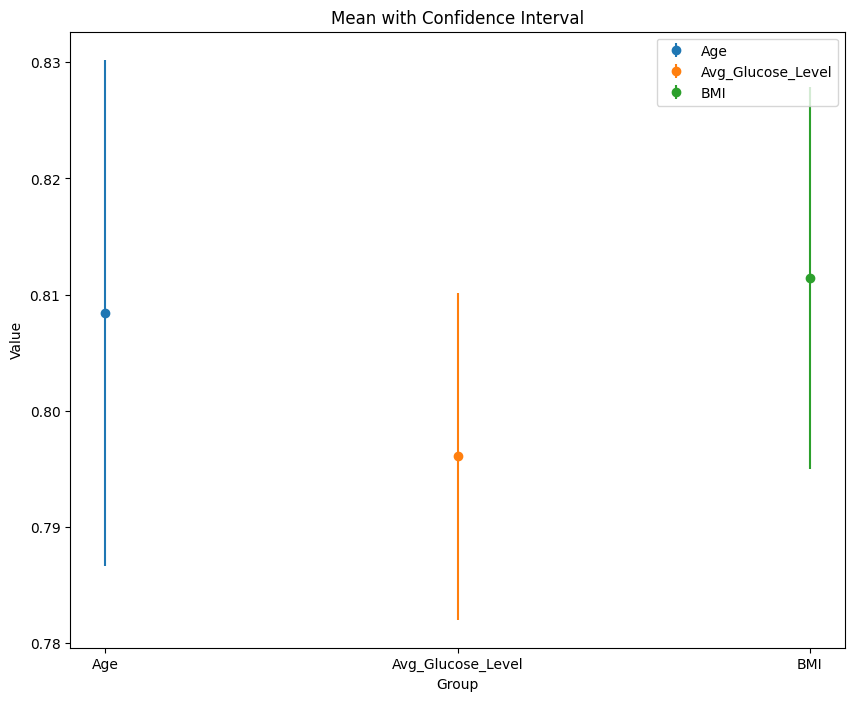

In [43]:
model_results = [
    ('Age', mean_accuracy_dt_20_age, confidence_interval_dt_20_age),
    ('Avg_Glucose_Level', mean_accuracy_dt_20_glucose, confidence_interval_dt_20_glucose),
    ('BMI', mean_accuracy_dt_20_bmi, confidence_interval_dt_20_bmi)
]
ML_algorithms.plot_confidence_intervals(model_results)

**Support Vector Machine**

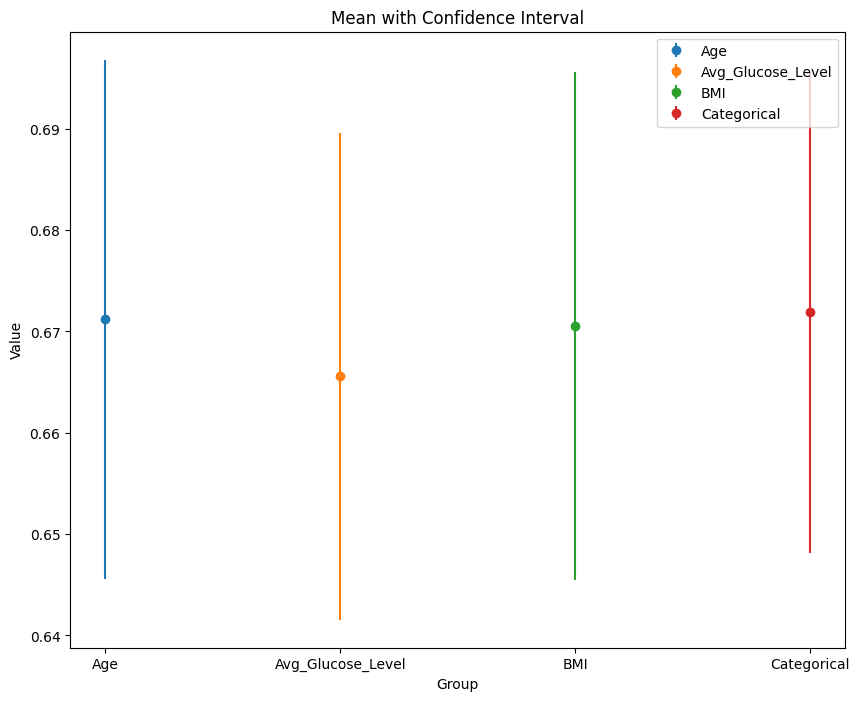

In [44]:
model_results = [
    ('Age', mean_accuracy_svm_age, confidence_interval_svm_age),
    ('Avg_Glucose_Level', mean_accuracy_svm_glucose, confidence_interval_svm_glucose),
    ('BMI', mean_accuracy_svm_bmi, confidence_interval_svm_bmi),
    ('Categorical', mean_accuracy_svm_categorical, confidence_interval_svm_categorical)
]
ML_algorithms.plot_confidence_intervals(model_results)

**Support Vector Machine - substitution of outliers**

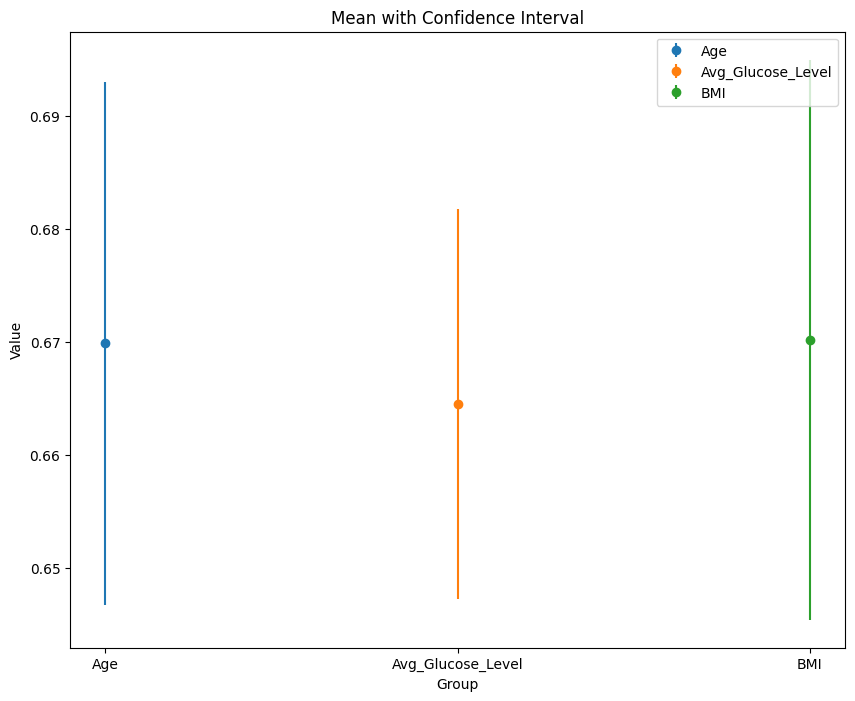

In [45]:
model_results = [
    ('Age', mean_accuracy_svm_20_age, confidence_interval_svm_20_age),
    ('Avg_Glucose_Level', mean_accuracy_svm_20_glucose, confidence_interval_svm_20_glucose),
    ('BMI', mean_accuracy_svm_20_bmi, confidence_interval_svm_20_bmi)
]
ML_algorithms.plot_confidence_intervals(model_results)